<a href="https://colab.research.google.com/github/kararmirza19/Resume-Sort-Model-training-ML/blob/main/Resume_Model_Traning_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from warnings import filterwarnings
filterwarnings('ignore')
import re


data = pd.read_csv("/content/UpdatedResumeDataSet.csv")
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
frame = data['Category'].value_counts().reset_index()
frame

,Category,count
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


In [ ]:
data.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [ ]:
data.shape

(962, 2)

<Axes: xlabel='count', ylabel='Category'>

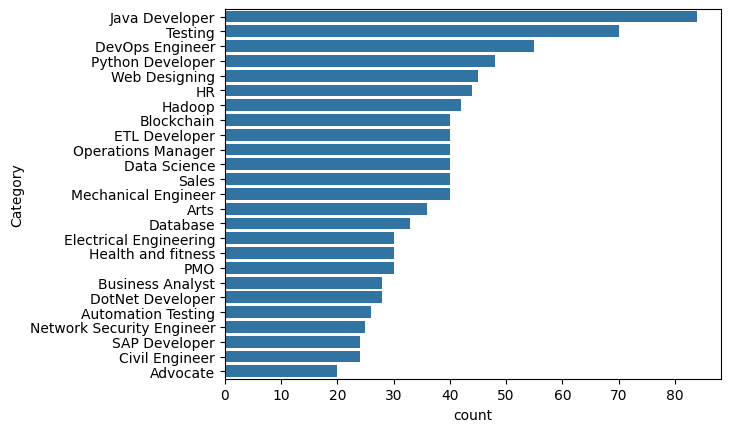

In [ ]:
sns.barplot(x='count', y='Category', data=frame)

In [ ]:
def clean(txt):
    txt = re.sub('http\S+\s*', ' ', txt)  # remove URLs
    txt = re.sub('RT|cc', ' ', txt)  # remove RT and cc
    txt = re.sub('#\S+', '', txt)  # remove hashtags
    txt = re.sub('@\S+', '  ', txt)  # remove @mentions
    txt = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', txt)  # remove punctuations
    txt = re.sub(r'[^\x00-\x7f]',r' ', txt)
    txt = re.sub('\s+', ' ', txt)  # remove extra whitespace
    return txt

In [ ]:
data['cleaned'] = data['Resume'].apply(lambda x: clean(x))
data.head()


,Category,Resume,cleaned
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
label = LabelEncoder()
data['Category'] = label.fit_transform(data['Category'])

data

,Category,Resume,cleaned
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
957,23,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
958,23,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive ...
959,23,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [ ]:
txt = data['cleaned'].values
target = data['Category'].values
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(txt)
WordFeatures = word_vectorizer.transform(txt)

WordFeatures

<962x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 113017 stored elements in Compressed Sparse Row format>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, target, test_size=0.2, random_state=42)

print(f"X_train { X_train.shape}")
print(f"X_test { X_test.shape}")
print(f"y_train { y_train.shape}")
print(f"y_test { y_test.shape}")


X_train (769, 1500)
X_test (193, 1500)
y_train (769,)
y_test (193,)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

In [ ]:
param_grid = {'n_neighbors' : [3,5,7,8]}

In [ ]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 8]}, scoring='accuracy')

In [ ]:
knn_classifier = KNeighborsClassifier()

In [ ]:
params = search.best_params_
score = search.best_score_

In [ ]:
best_k = params['n_neighbors']
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)

In [ ]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn_classifier.predict(X_test)
class_report = classification_report(y_test, y_pred)
print("Best Parameters:", params)
print("Best Score (CV Accuracy):", score*100)
print(class_report)

Best Parameters: {'n_neighbors': 3}
Best Score (CV Accuracy): 97.27102962397079
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        15
 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

models = {
    'LogisticRegression': LogisticRegression(),
    'MultinomialNB': MultinomialNB()
}


accuracy_scores = {}

for mod_name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy


    print(f'Accuracy of {mod_name} on test set: {accuracy:.2f}')



Accuracy of LogisticRegression on test set: 0.99
Accuracy of MultinomialNB on test set: 0.96


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(data['Resume'])
required_txt = tfidf.transform(data['Resume'])
required_txt


<962x7384 sparse matrix of type '<class 'numpy.float64'>'
	with 164274 stored elements in Compressed Sparse Row format>